In [38]:
import math
import numpy as np
import pandas as pd
import scipy.optimize as optim
import matplotlib.pyplot as plt

In [39]:
df= pd.read_csv('swiss_rawdata.csv')
df=df.dropna(axis=1, how='all')
df=df.dropna(axis = 0, how = 'all')
df=df[['date','Confirmed']]

In [40]:
df.head()

,date,Confirmed
0,09-01-2021,782869
1,09-02-2021,785696
2,09-03-2021,785696
3,09-04-2021,785696
4,09-05-2021,785696


In [41]:
df.tail()

,date,Confirmed
195,03-15-2022,3170937
196,03-16-2022,3206975
197,03-17-2022,3241348
198,03-18-2022,3268953
199,03-19-2022,3268953


In [42]:
df["date"]=np.arange(len(df))

In [43]:
df.head()

,date,Confirmed
0,0,782869
1,1,785696
2,2,785696
3,3,785696
4,4,785696


In [44]:
def logistic(t,a,b,c): #Q(t) the number of cases at time t 
    #a constant, b incubation rate, c cap value(the maximum number of cases for Q(t))
    return c/(1+a*np.exp(-b*t))#Q(t)
# #cased at begining c/(1+a)
# key point:t_fast= ln(a/b) : when the cumulative situation curve turns (rapid increase-> slow increase)
#Q(t_fast)=c/2
#a,b,c initialized randomly & update with nonlinear least square 
# upper bound of b: according to pandemic situation for each country
#d model the growth of COVID-19 with Logistic formula
#and learn the parameters a, b and c

In [45]:
#randomly initialize a,b,c
p0=np.array([3,6,4000000])

In [46]:
#set lower & upper bounds for a,b,c
bounds=(0,[6000000,200,4500000])

In [73]:
#Nonlinear Least Squares optimization 
#gives us the values for a, b and c that minimize the Least Square Error of our model.
x = np.array(df['date'])+1 #start from 1
y = np.array(df['Confirmed'])##
(a,b,c),cov = optim.curve_fit(logistic, x, y, bounds=bounds, p0=p0)

In [74]:
(a,b,c)

(10.955182988011199, 0.015165735919525733, 4499999.9999999935)

In [75]:
cov

array([[ 8.30711804e-01, -5.39462695e-04,  3.54098514e+05],
       [-5.39462695e-04,  1.32434982e-06, -5.49384064e+02],
       [ 3.54098514e+05, -5.49384064e+02,  2.57667693e+11]])

In [76]:
def logistic_f(t):
    return c/(1+a*np.exp(-b*t))

Text(0, 0.5, 'Infections')

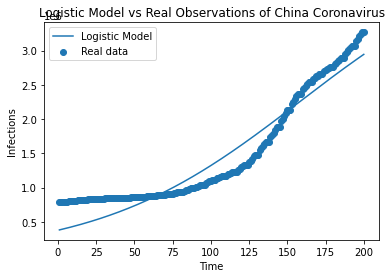

In [77]:
plt.scatter(x, y)
plt.plot(x,logistic_f(x))
plt.title('Logistic Model vs Real Observations of China Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Time')
plt.ylabel('Infections')

In [72]:
# The time step at which the growth is fastest
t_fastest = np.log(a) / b
t_fastest

0.18310204811135164

In [18]:
# First way to find the y of the fastest growth moment
y_fastest = c / 2
y_fastest

2249999.9999999967

In [20]:
# Second way to find the y of the fastest growth moment


In [ ]:
#https://towardsdatascience.com/modeling-logistic-growth-1367dc971de2
#https://jooskorstanje.com/modeling-logistic-growth-corona.html